# Multioutput Classification
1) generalization of multilabel classification where each label can be multiclass(i.e, it can have more than 2 possible values(0/1))

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255).


In [2]:
#loading mnist dataset
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

X,y = mnist['data'].to_numpy(), mnist['target'].to_numpy()
y = y.astype(np.uint8)

X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]


In [3]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Text(0.5, 1.0, 'Original Image')

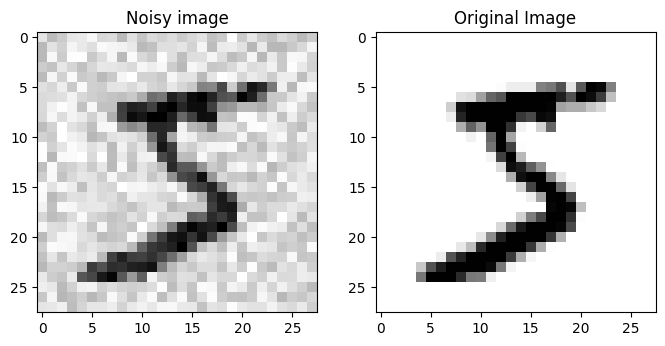

In [8]:
noisy_img = X_train_mod[0].reshape(28,28)
original_img = X_train[0].reshape(28,28)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(noisy_img,cmap='binary')
plt.title('Noisy image')

plt.subplot(2,2,2)
plt.imshow(original_img,cmap='binary')
plt.title('Original Image')

In [9]:
#plot digit function
def plot_digit(digit_data):
    digit_image = digit_data.reshape(28,28)

    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.show()
    

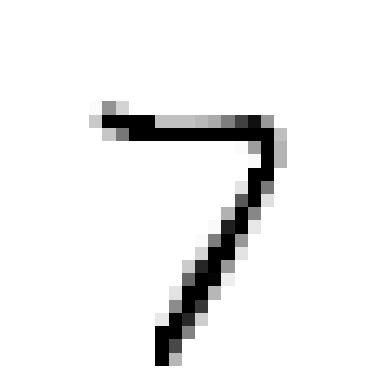

In [10]:
#training a clf and make it clean this image
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)

Text(0.5, 1.0, 'Original Image')

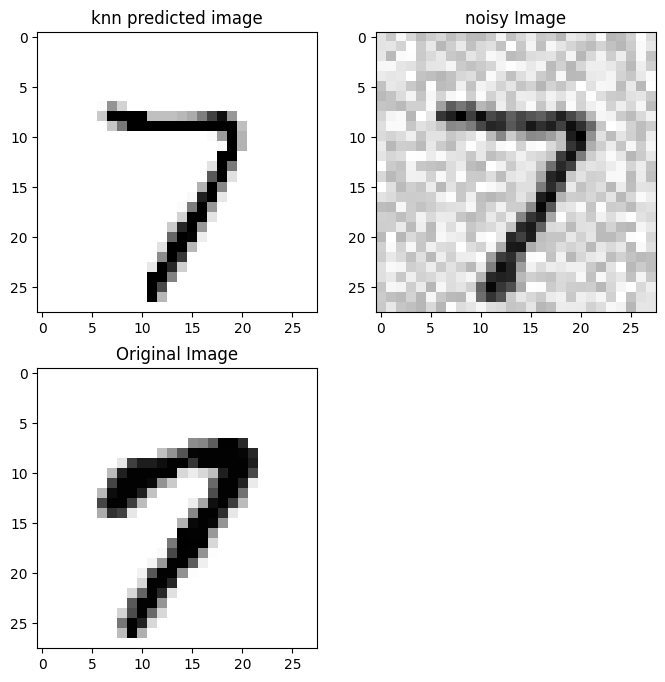

In [31]:
knn_clean = clean_digit.reshape(28,28)
noisy_img = X_test_mod[0].reshape(28,28)
X_train_df = mnist['data']
original_img = X_train_df.iloc[15].values.reshape(28,28)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(knn_clean,cmap='binary')
plt.title('knn predicted image')

plt.subplot(2,2,2)
plt.imshow(noisy_img,cmap='binary')
plt.title('noisy Image')

plt.subplot(2,2,3)
plt.imshow(original_img,cmap='binary')
plt.title('Original Image')